In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import os

In [2]:
keras.__version__

'2.3.0-tf'

In [3]:
path = "C:/Users/suhas/Documents/Mini Project/Leaves/"
test = "C:/Users/suhas/Documents/Mini Project/Leaves/Test"

In [14]:
IMAGE_SIZE = 100
num_classes = 32
epochs = 100
initializer = 'he_normal'

In [5]:
def label(img_name):
    num = img_name.split('_')[1]
    #print(num)
    if num == 'pubescent bamboo':
        return 0 
    elif num == 'chinese horse chestnut':
        return 1 
    elif num == 'anhui barberry':
        return 2 
    elif num == 'chinese redbud':
        return 3
    elif num == 'true indigo':
        return 4
    elif num == 'japanese maple':
        return 5 
    elif num == 'nanmu':
        return 6 
    elif num == 'castor aralia':
        return 7 
    elif num == 'chinese cinnamon':
        return 8 
    elif num == 'goldenrain tree':
        return 9 
    elif num == 'big fruited holly':
        return 10 
    elif num == 'japanese chestwood':
        return 11 
    elif num == 'wintersweet':
        return 12 
    elif num == 'camphor tree':
        return 13
    elif num == 'japan arrowwood':
        return 14
    elif num == 'sweet osmanthus':
        return 15
    elif num == 'deodar':
        return 16
    elif num == 'ginkgo':
        return 17 
    elif num == 'crape myrtle':
        return 18 
    elif num == 'oleandar':
        return 19
    elif num == 'yew plum pie':
        return 20
    elif num == 'japanese flowering cherry':
        return 21 
    elif num == 'glossy privet':
        return 22
    elif num == 'chinese toon':
        return 23
    elif num == 'peach':
        return 24
    elif num == 'ford woodlotus':
        return 25
    elif num == 'trident maple':
        return 26
    elif num == 'beales barberry':
        return 27
    elif num == 'southern magnolia':
        return 28
    elif num == 'canadian poplar':
        return 29
    elif num == 'chinese tulip tree':
        return 30
    elif num == 'tangerine':
        return 31

# Creating Dataset

In [80]:
def create_dataset(path):
    data = []
    for folder in os.scandir(path):
        if "leaf" in str(folder):
            for image in os.scandir(os.path.join(path, folder)):
                leaf = label(folder.name)
                if (leaf == None):
                    print(folder.name)
                    break
                img = cv2.imread(os.path.join(path, folder, image))

                # Basic processing
                imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
                thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                imgInv = cv2.bitwise_not(imgBW)
                kernel = np.ones((50, 50))
                imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)

                # Resize
                new = cv2.resize(imgClosed, (IMAGE_SIZE, IMAGE_SIZE))
                #Adding third dimension to shape
                new.shape += (1,)
                data.append([new, leaf])
    return data

In [81]:
data = create_dataset(path)

In [82]:
X = np.array([d[0] for d in data])
len(X)

1907

In [83]:
X = np.divide(X, 255)
len(X)
X.shape

(1907, 100, 100, 1)

In [84]:
y = np.array([d[1] for d in data])
len(y)

1907

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 1, stratify=y_train)

# CNN

In [86]:
model = Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    layers.Conv2D(64, 5, padding='same', activation='relu', kernel_initializer=initializer),
    layers.MaxPool2D(),
    layers.BatchNormalization(),
    # Dropout layer for regularisation
    layers.Dropout(rate=0.5),
    # Flattening output to connect to Densely Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer)
])

In [87]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [88]:
X_train.shape

(1072, 100, 100, 1)

In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 50, 50, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 25, 25, 32)       

(726, 100, 100, 1)

In [108]:
history = model.fit(x=X_train, y=y_train, epochs=epochs, validation_data = (X_val, y_val), use_multiprocessing = True, batch_size=32)

Epoch 1/100
34/34 [==============================] - 7s 203ms/step - loss: 2.5686 - accuracy: 0.9515 - val_loss: 2.7801 - val_accuracy: 0.7458
Epoch 2/100
34/34 [==============================] - 7s 206ms/step - loss: 2.5687 - accuracy: 0.9515 - val_loss: 2.7649 - val_accuracy: 0.7654
Epoch 3/100
34/34 [==============================] - 7s 202ms/step - loss: 2.5706 - accuracy: 0.9506 - val_loss: 2.7827 - val_accuracy: 0.7542
Epoch 4/100
34/34 [==============================] - 7s 206ms/step - loss: 2.5696 - accuracy: 0.9506 - val_loss: 2.7627 - val_accuracy: 0.7682
Epoch 5/100
34/34 [==============================] - 7s 203ms/step - loss: 2.5697 - accuracy: 0.9496 - val_loss: 2.7714 - val_accuracy: 0.7598
Epoch 6/100
34/34 [==============================] - 7s 205ms/step - loss: 2.5701 - accuracy: 0.9524 - val_loss: 2.7463 - val_accuracy: 0.7877
Epoch 7/100
34/34 [==============================] - 7s 205ms/step - loss: 2.5722 - accuracy: 0.9506 - val_loss: 2.7593 - val_accuracy: 0.7709

Epoch 58/100
34/34 [==============================] - 9s 268ms/step - loss: 2.5452 - accuracy: 0.9729 - val_loss: 2.7393 - val_accuracy: 0.7933
Epoch 59/100
34/34 [==============================] - 8s 238ms/step - loss: 2.5466 - accuracy: 0.9720 - val_loss: 2.7406 - val_accuracy: 0.7849
Epoch 60/100
34/34 [==============================] - 8s 237ms/step - loss: 2.5457 - accuracy: 0.9729 - val_loss: 2.7381 - val_accuracy: 0.7933
Epoch 61/100
34/34 [==============================] - 8s 240ms/step - loss: 2.5458 - accuracy: 0.9729 - val_loss: 2.7343 - val_accuracy: 0.7961
Epoch 62/100
34/34 [==============================] - 8s 239ms/step - loss: 2.5470 - accuracy: 0.9729 - val_loss: 2.7350 - val_accuracy: 0.7989
Epoch 63/100
34/34 [==============================] - 8s 237ms/step - loss: 2.5470 - accuracy: 0.9720 - val_loss: 2.7398 - val_accuracy: 0.7905
Epoch 64/100
34/34 [==============================] - 8s 245ms/step - loss: 2.5469 - accuracy: 0.9729 - val_loss: 2.7453 - val_accuracy:

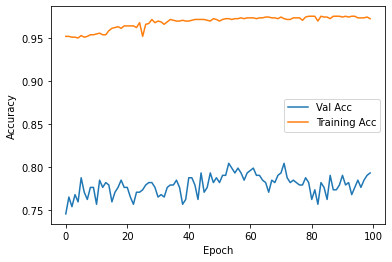

In [109]:
plt.figure()
plt.plot([i for i in range(epochs)], history.history['val_accuracy'], label='Val Acc')
plt.plot([i for i in range(epochs)], history.history['accuracy'], label='Training Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [92]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [110]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 1s 39ms/step - loss: 2.7648 - accuracy: 0.7568


[2.7647666931152344, 0.7568134069442749]

In [127]:
tf.keras.models.save_model(model, 'C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal/model')

INFO:tensorflow:Assets written to: C:/Users/suhas/Documents/College Projects/Leaf-Classification-Medicinal/model\assets


In [94]:
max(history.history['val_accuracy'])

0.7681564092636108

In [123]:
i = 0

In [124]:
 for folder in os.scandir(path):
        if "leaf" in str(folder):
            for image in os.scandir(os.path.join(path, folder)):
                leaf = label(folder.name)
                if (leaf == None):
                    print(folder.name)
                    break
                img = cv2.imread(os.path.join(path, folder, image))

                # Basic processing
                imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 0)
                thresh, imgBW = cv2.threshold(imgBlur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                imgInv = cv2.bitwise_not(imgBW)
                kernel = np.ones((50, 50))
                imgClosed = cv2.morphologyEx(imgInv, cv2.MORPH_CLOSE, kernel)

                # Resize
                new = cv2.resize(imgClosed, (IMAGE_SIZE, IMAGE_SIZE))
                new.shape += (1,)
                i +=1
                if ( i == 400):
                    print(folder.name)
                    break
            if (i == 400):
                break

leaf_chinese cinnamon


None


In [125]:

#Adding third dimension to shape
new.shape = (1,) + new.shape
#print(new.shape, flush=True)
pred = model.predict(new)

In [126]:
pred.argmax()

9